In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

mkdir: cannot create directory ‘/root’: Permission denied
mkdir: cannot create directory ‘/root’: Permission denied
ln: failed to create symbolic link '/content': Permission denied
ln: failed to create symbolic link '/content': Permission denied
Updating fastai...
Done.


In [3]:
!pip install https://github.com/fastai/fastai/archive/1.0.60.zip

  Using cached https://github.com/fastai/fastai/archive/1.0.60.zip
  Created wheel for fastai: filename=fastai-1.0.60-cp37-none-any.whl size=237313 sha256=e057a29765c0da1f77802ae53825c6cafdeb59c997c962fe8bd810a2f7e7696d
  Stored in directory: /tmp/pip-ephem-wheel-cache-7mvnic2m/wheels/3d/ac/9f/c6614d09baed5c88b90006ce72227c774499ebca6be67042b0
Successfully built fastai


In [4]:
from fastai.vision import *
from fastai.callbacks import *

In [5]:
from pathlib import Path

In [6]:
bs = 128

## Downloading data

In [7]:
path = Path(".")
train = path/'train/'
valid = path/'valid/'
test = path/'test/'
train, test, valid, path

(PosixPath('train'), PosixPath('test'), PosixPath('valid'), PosixPath('.'))

In [9]:
np.random.seed(42)

In [10]:
??get_transforms

In [8]:
data = ImageDataBunch.from_folder(path=path, test='test', ds_tfms=get_transforms(), size=128, 
                                  bs=bs).normalize(imagenet_stats)

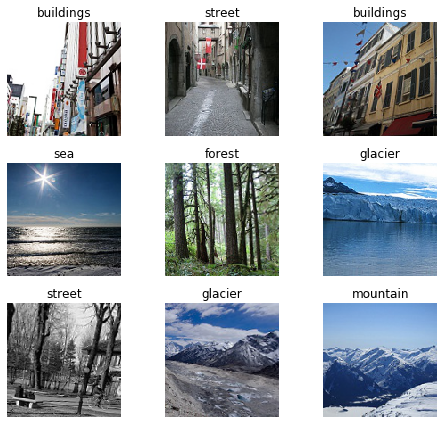

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data.classes)
len(data.classes),data.c

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


(6, 6)

## Training: resnet34

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.730090,0.367229,0.121000,0.879000,00:52
1,0.448128,0.286465,0.099000,0.901000,00:14
2,0.335287,0.273780,0.101667,0.898333,00:14
3,0.297951,0.258681,0.094667,0.905333,00:14


In [16]:
learn.save('stage-1')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

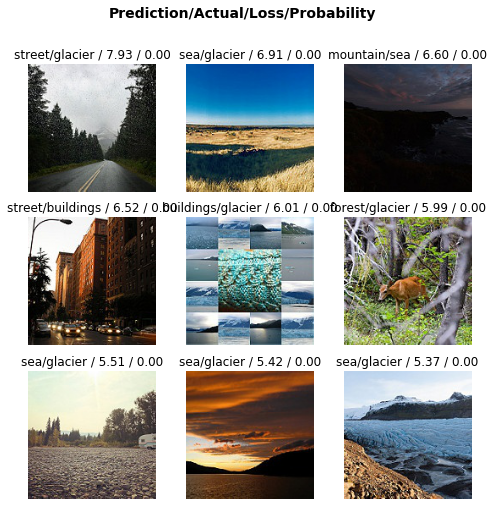

In [18]:
interp.plot_top_losses(9, figsize=(8,8))

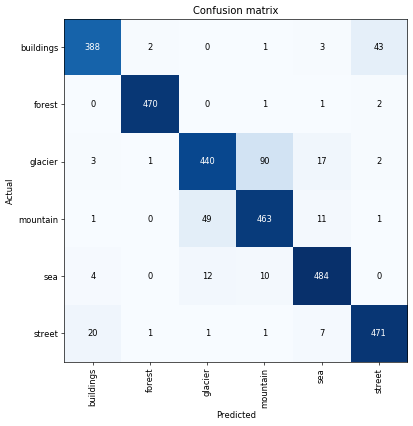

In [19]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [20]:
interp.most_confused(min_val=10)

[('glacier', 'mountain', 90),
 ('mountain', 'glacier', 49),
 ('buildings', 'street', 43),
 ('street', 'buildings', 20),
 ('glacier', 'sea', 17),
 ('sea', 'glacier', 12),
 ('mountain', 'sea', 11),
 ('sea', 'mountain', 10)]

In [24]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


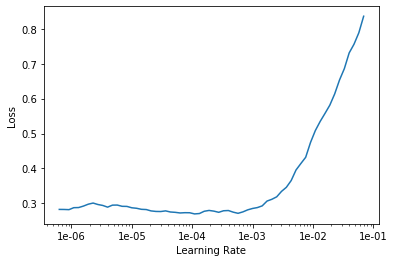

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(4, max_lr=slice(5e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.261777,0.258563,0.083667,0.916333,00:14
1,0.215177,0.211498,0.077667,0.922333,00:14
2,0.140198,0.191190,0.071333,0.928667,00:14
3,0.094711,0.185502,0.067667,0.932333,00:14


In [27]:
learn.save('stage2-r34')

In [28]:
learn.fit_one_cycle(4, max_lr=slice(5e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.102340,0.251799,0.078333,0.921667,00:15
1,0.148819,0.213849,0.074333,0.925667,00:14
2,0.101752,0.190412,0.060000,0.940000,00:15
3,0.054166,0.187782,0.056333,0.943667,00:14


In [29]:
learn.save('stage3-r34')

In [13]:
learn.load('stage3-r34')

Learner(data=ImageDataBunch;

Train: LabelList (14034 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
forest,forest,forest,forest,forest
Path: .;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
forest,forest,forest,forest,forest
Path: .;

Test: LabelList (7301 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: ., model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Co

In [14]:
# increasing image size to 256x256
data = ImageDataBunch.from_folder(path=path, test='test', ds_tfms=get_transforms(), size=256, 
                                  bs=bs).normalize(imagenet_stats)
learn.data = data

In [15]:
learn.freeze()
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.133185,0.205279,0.062667,0.937333,00:54
1,0.128266,0.185476,0.060667,0.939333,00:36
2,0.117055,0.178474,0.058333,0.941667,00:36
3,0.098632,0.173799,0.058333,0.941667,00:36


epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


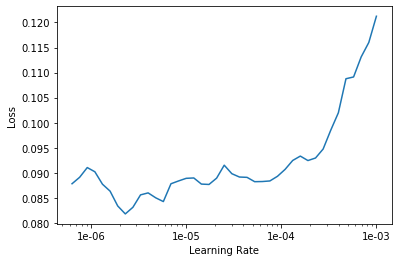

In [16]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(4, max_lr=slice(1e-7,5e-6))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.093560,0.173872,0.058000,0.942000,00:48
1,0.088114,0.171899,0.059333,0.940667,00:48
2,0.087941,0.173904,0.058667,0.941333,00:48
3,0.083524,0.172386,0.059667,0.940333,00:48


In [18]:
learn.save('stage1-256-r34')

In [19]:
learn.freeze()
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.097050,0.177685,0.056333,0.943667,00:36
1,0.106909,0.187665,0.060333,0.939667,00:36
2,0.104535,0.183247,0.056333,0.943667,00:36
3,0.096495,0.183040,0.056333,0.943667,00:36
4,0.079369,0.179630,0.056333,0.943667,00:36
5,0.070667,0.177463,0.055667,0.944333,00:36


In [29]:
learn.save('stage2-256-r34') #best

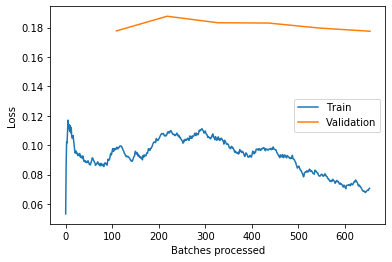

In [30]:
learn.recorder.plot_losses()

In [14]:
learn.load('stage2-256-r34')

Learner(data=ImageDataBunch;

Train: LabelList (14034 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
forest,forest,forest,forest,forest
Path: .;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
forest,forest,forest,forest,forest
Path: .;

Test: LabelList (7301 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: ., model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Co

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)



True

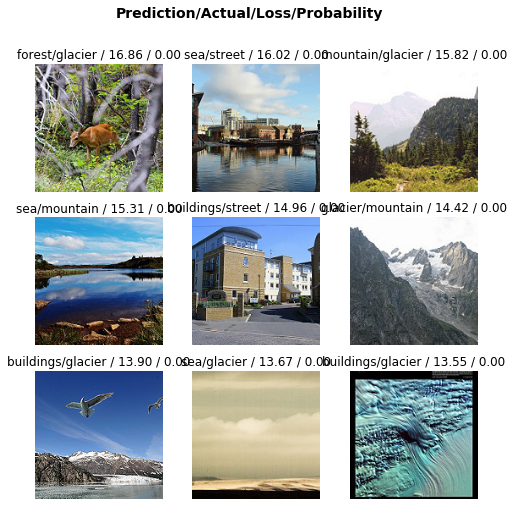

In [16]:
interp.plot_top_losses(9, figsize=(8,8))

In [21]:
??interp.plot_top_losses

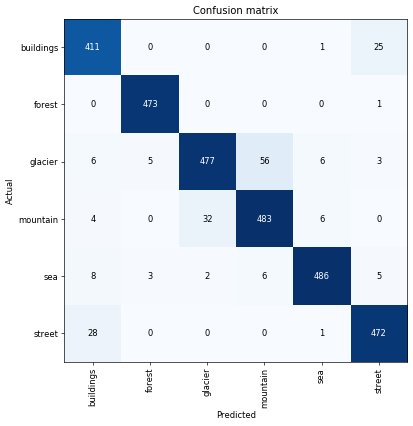

In [17]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)


In [18]:
interp.most_confused(min_val=10)

[('glacier', 'mountain', 56),
 ('mountain', 'glacier', 32),
 ('street', 'buildings', 28),
 ('buildings', 'street', 25)]

In [19]:
learn.export()

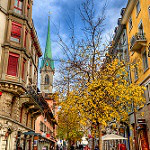

In [22]:
img = open_image(path/test/'10004.jpg')
img

In [23]:
defaults.device = torch.device('cpu')
pred_class, pred_idx, outputs = learn.predict(img)
pred_class, pred_idx, outputs # the outputs variable contains the confidence of each class

(Category street,
 tensor(5),
 tensor([1.7179e-02, 2.3339e-06, 1.7595e-10, 2.4793e-08, 1.6146e-09, 9.8282e-01]))

## Training: resnet50

In [22]:
data = ImageDataBunch.from_folder(path=path, test='test', ds_tfms=get_transforms(), size=128, 
                                  bs=bs).normalize(imagenet_stats)

In [23]:
learn50 = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate])

In [24]:
learn50.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.585702,0.422340,0.866667,0.133333,00:23
1,0.388767,0.302028,0.893667,0.106333,00:21
2,0.310087,0.261638,0.906000,0.094000,00:21
3,0.255946,0.226709,0.919000,0.081000,00:21
4,0.214965,0.221664,0.918000,0.082000,00:21
5,0.183408,0.216524,0.919667,0.080333,00:21


In [26]:
learn50.save('stage-1-50')

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


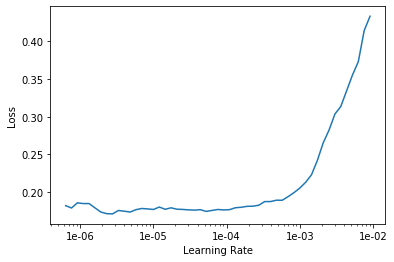

In [25]:
learn50.unfreeze()
learn50.lr_find()
learn50.recorder.plot()

In [27]:
learn50.fit_one_cycle(6, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.189954,0.205367,0.924000,0.076000,00:27
1,0.167653,0.192528,0.930333,0.069667,00:27
2,0.139399,0.196726,0.933333,0.066667,00:27
3,0.109392,0.185454,0.929667,0.070333,00:27
4,0.089231,0.188037,0.932000,0.068000,00:27
5,0.073152,0.184829,0.931667,0.068333,00:27


In [28]:
learn50.save('stage-2-50')

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


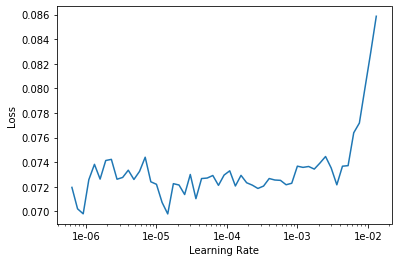

In [31]:
learn50.freeze()
learn50.lr_find()
learn50.recorder.plot()

In [32]:
learn50.fit_one_cycle(4, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.073208,0.186279,0.933000,0.067000,00:21
1,0.074127,0.186503,0.933667,0.066333,00:21
2,0.073078,0.187288,0.933333,0.066667,00:21
3,0.072749,0.186709,0.934333,0.065667,00:21


In [33]:
learn50.save('stage-3-50')

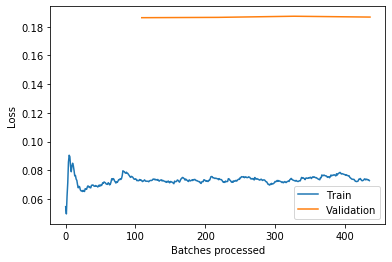

In [34]:
learn50.recorder.plot_losses()

In [35]:
# increasing image size to 256x256
data = ImageDataBunch.from_folder(path=path, test='test', ds_tfms=get_transforms(), size=256, 
                                  bs=bs).normalize(imagenet_stats)
learn50.data = data

In [36]:
learn50.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.154192,0.195280,0.931333,0.068667,01:16
1,0.166698,0.193432,0.931667,0.068333,01:13
2,0.148221,0.169005,0.938333,0.061667,01:13
3,0.126313,0.176165,0.943333,0.056667,01:13
4,0.099411,0.167449,0.943000,0.057000,01:13
5,0.085753,0.166240,0.943333,0.056667,01:12


In [37]:
learn50.save('stage1-256-50')

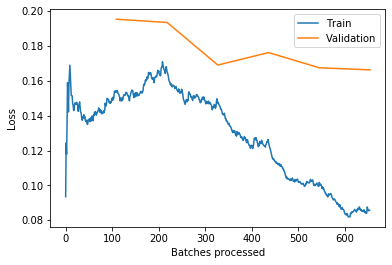

In [38]:
learn50.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


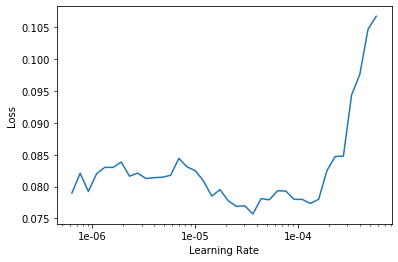

In [39]:
learn50.unfreeze()
learn50.lr_find()
learn50.recorder.plot()

In [40]:
learn50.fit_one_cycle(6, max_lr=slice(7e-6, 8e-5))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.081913,0.170915,0.940667,0.059333,01:33
1,0.087727,0.175287,0.942667,0.057333,01:33
2,0.073472,0.178538,0.944333,0.055667,01:34
3,0.055753,0.183133,0.940667,0.059333,01:33
4,0.047187,0.181109,0.944000,0.056000,01:33
5,0.041714,0.178930,0.943333,0.056667,01:34


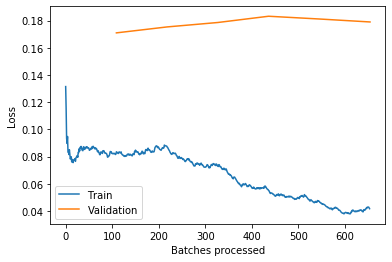

In [41]:
learn50.recorder.plot_losses()

In [42]:
learn50.save('stage2-256-50')

In [45]:
sizes = [32, 64, 128, 224]

In [49]:
def get_data(sz, bs):
  data = ImageDataBunch.from_folder(path=path, test='test', ds_tfms=get_transforms(), size=sz, bs=bs).normalize(imagenet_stats)
  return data

In [51]:
sz = 128; i = 6
learn50 = cnn_learner(get_data(sz, bs), models.resnet50, metrics=[error_rate, accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_128')])
learn50.load('stage2-256-50')
learn50.fit_one_cycle(6*i)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.081690,0.238853,0.066667,0.933333,00:21
1,0.077219,0.233897,0.067667,0.932333,00:21
2,0.071518,0.235150,0.065333,0.934667,00:21
3,0.060929,0.241001,0.065667,0.934333,00:21
4,0.060971,0.264873,0.067333,0.932667,00:21
5,0.067749,0.241112,0.067000,0.933000,00:21
6,0.068457,0.268032,0.066333,0.933667,00:21
7,0.059881,0.273725,0.068333,0.931667,00:21
8,0.061121,0.307647,0.065333,0.934667,00:21
9,0.066278,0.304890,0.072667,0.927333,00:21


Better model found at epoch 0 with accuracy value: 0.9296666383743286.


In [52]:
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.046415,0.398289,0.083000,0.917000,00:27
1,0.172129,0.284051,0.080000,0.920000,00:27
2,0.205713,0.262596,0.082000,0.918000,00:27
3,0.204156,0.246740,0.087333,0.912667,00:27
4,0.165047,0.272900,0.088667,0.911333,00:27
5,0.176852,0.231682,0.077667,0.922333,00:27
6,0.123617,0.241775,0.074000,0.926000,00:27
7,0.096996,0.231055,0.074333,0.925667,00:27
8,0.064171,0.236113,0.065667,0.934333,00:27
9,0.038432,0.241743,0.062667,0.937333,00:27


Better model found at epoch 0 with accuracy value: 0.9296666383743286.


In [53]:
sz = 224; i = 7
data=get_data(sz, bs)
learn50.data = data
learn50.fit_one_cycle(10)
learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.070876,0.213599,0.063667,0.936333,01:19
1,0.109016,0.303560,0.088000,0.912000,01:14
2,0.141481,0.310791,0.096667,0.903333,01:14
3,0.152074,0.264491,0.095000,0.905000,01:14
4,0.131698,0.247406,0.085000,0.915000,01:14
5,0.089428,0.247438,0.077333,0.922667,01:14
6,0.060869,0.214514,0.060667,0.939333,01:14
7,0.030274,0.256753,0.060333,0.939667,01:14
8,0.019093,0.255439,0.057000,0.943000,01:14
9,0.013264,0.251823,0.056000,0.944000,01:14


Better model found at epoch 0 with accuracy value: 0.9296666383743286.


### Submission

In [1]:
import numpy as np
import pandas as pd

In [10]:
learn.load('stage2-256-r34')
log_preds, test_labels = learn.get_preds(ds_type=DatasetType.Test)

In [11]:
preds = np.argmax(log_preds, 1)
preds

tensor([5, 1, 0,  ..., 5, 2, 2])

In [12]:
a = np.array(preds)

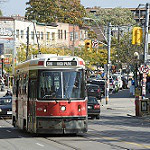

In [13]:
data.test_ds.x[0]

In [15]:
submission = pd.DataFrame({'image_name': os.listdir('test'), 'label': a})
submission.head(10)

,image_name,label
0,4535.jpg,5
1,1995.jpg,1
2,11488.jpg,0
3,10166.jpg,3
4,9665.jpg,0
5,18118.jpg,1
6,23083.jpg,4
7,24090.jpg,3
8,17083.jpg,0
9,13561.jpg,2


In [16]:
submission.to_csv(path/'submission_fastai_res50.csv', index=False)